In [55]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
# Load data
df = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')

# Dataset Information

In [58]:
# Preview of data
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [59]:
# Number of columns and samples
columns = len(df.columns)
samples = len(df)
print(f"No. of Columns: {columns}")
print(f"No. of Samples: {samples}")

No. of Columns: 22
No. of Samples: 253680


In [60]:
# Basic statistics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [61]:
# Drop columns which are not related to the health indicators
df.drop(columns=["Education", "Income"], inplace=True)

# Dataset Visualisation

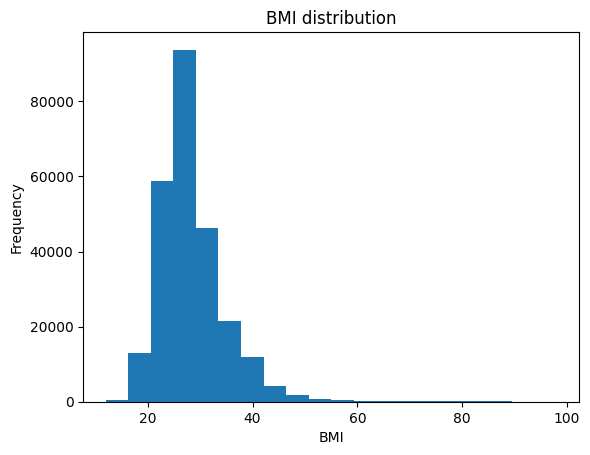

In [62]:
# BMI Distribution
plot = df["BMI"].hist(bins=20)
plot.set_title('BMI distribution')
plot.set_xlabel('BMI')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.savefig("../visualisations/bmi_distribution.png")
plt.show()

In [63]:
# Find Null Values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

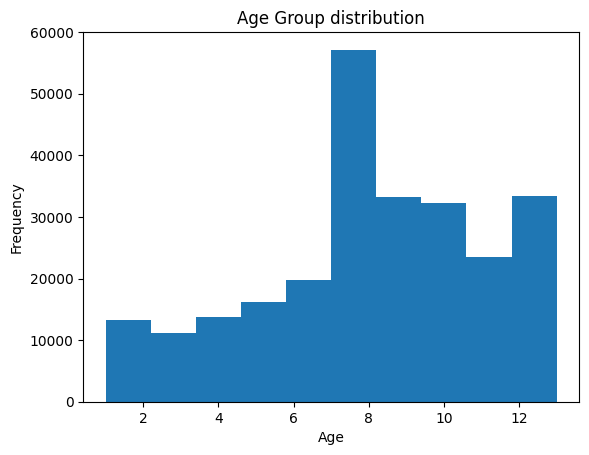

In [64]:
# Age Group Distribution
plot = df["Age"].hist()
plot.set_title('Age Group distribution')
plot.set_xlabel('Age')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.savefig('../visualisations/age_group_distribution.png')
plt.show()

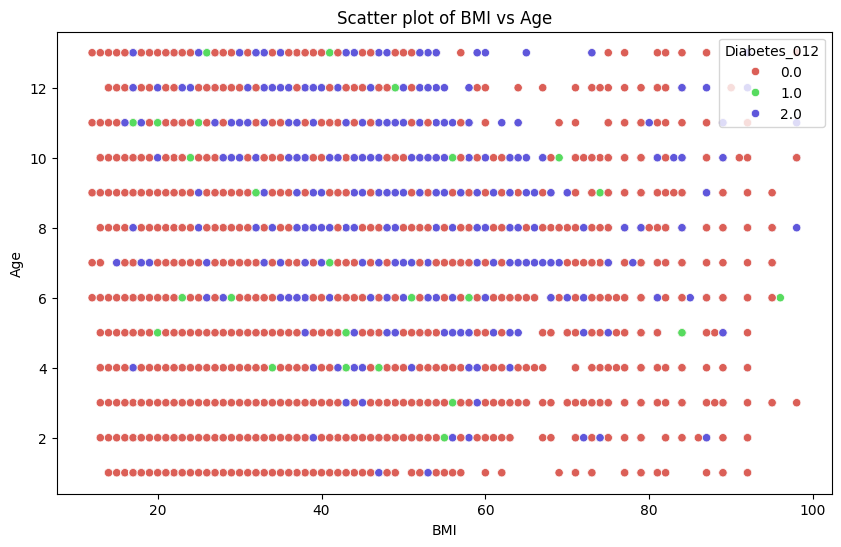

In [65]:
# Scatter plot for Age vs BMI
palette = sns.color_palette("hls", 3)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Age', hue='Diabetes_012', palette=palette)
plt.title('Scatter plot of BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.savefig('../visualisations/age_bmi_scatterplot.png')
plt.show()

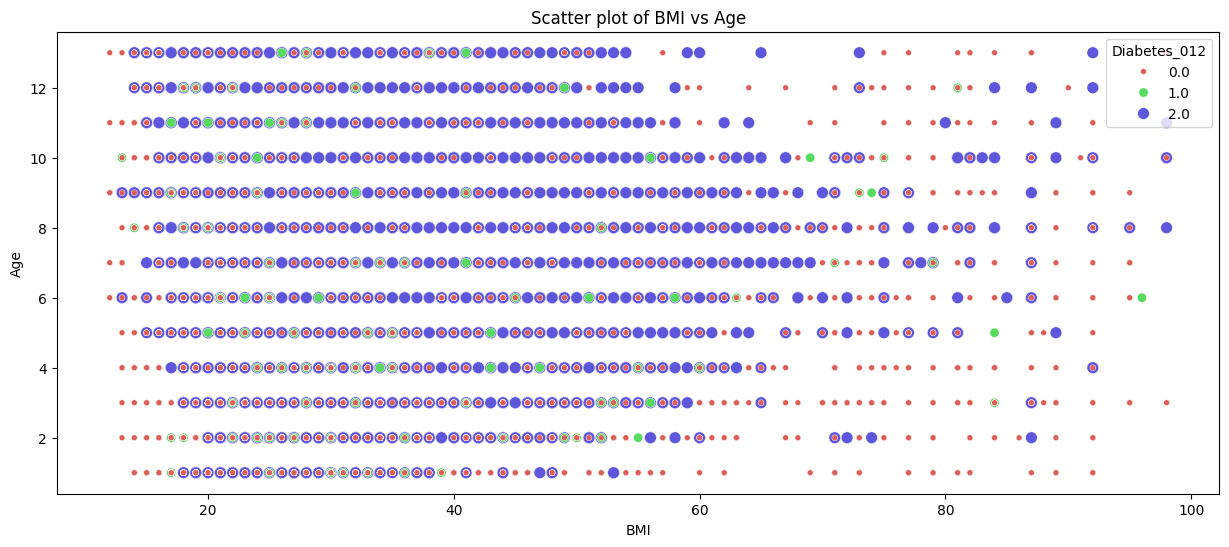

In [66]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='BMI', y='Age', hue='Diabetes_012', palette=palette,size='Diabetes_012')
plt.title('Scatter plot of BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.savefig('../visualisations/age_bmi_scatterplot_size.png')
plt.show()

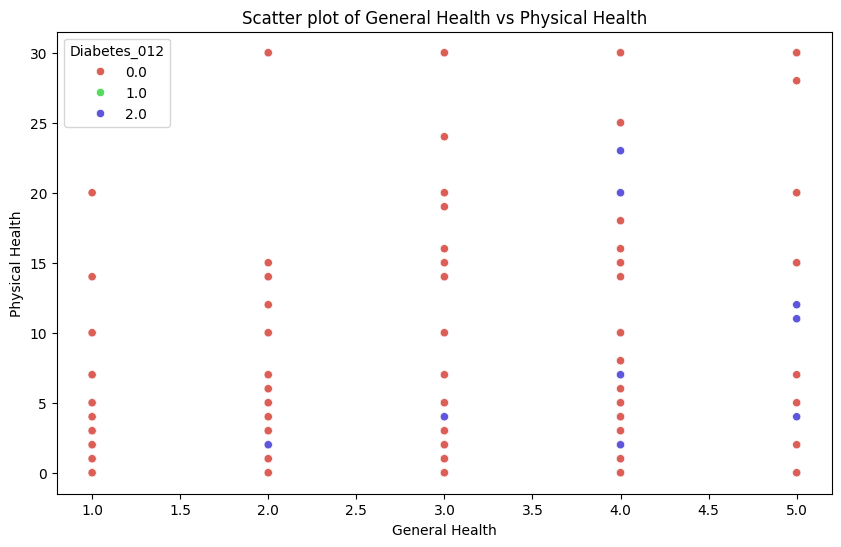

In [67]:
# Scatter plot for General Health vs Physical Health
plt.figure(figsize=(10, 6))

# Get top 1000 samples to avoid overplotting
sns.scatterplot(data=df.sample(1000), x='GenHlth', y='PhysHlth', hue='Diabetes_012', palette=palette)

plt.title('Scatter plot of General Health vs Physical Health')
plt.xlabel('General Health')
plt.ylabel('Physical Health')
plt.savefig('../visualisations/genhealth_phyhealth_scatterplot.png')
plt.show()

In [68]:
# Find correlation data
corr = df.corr() 
corr

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547


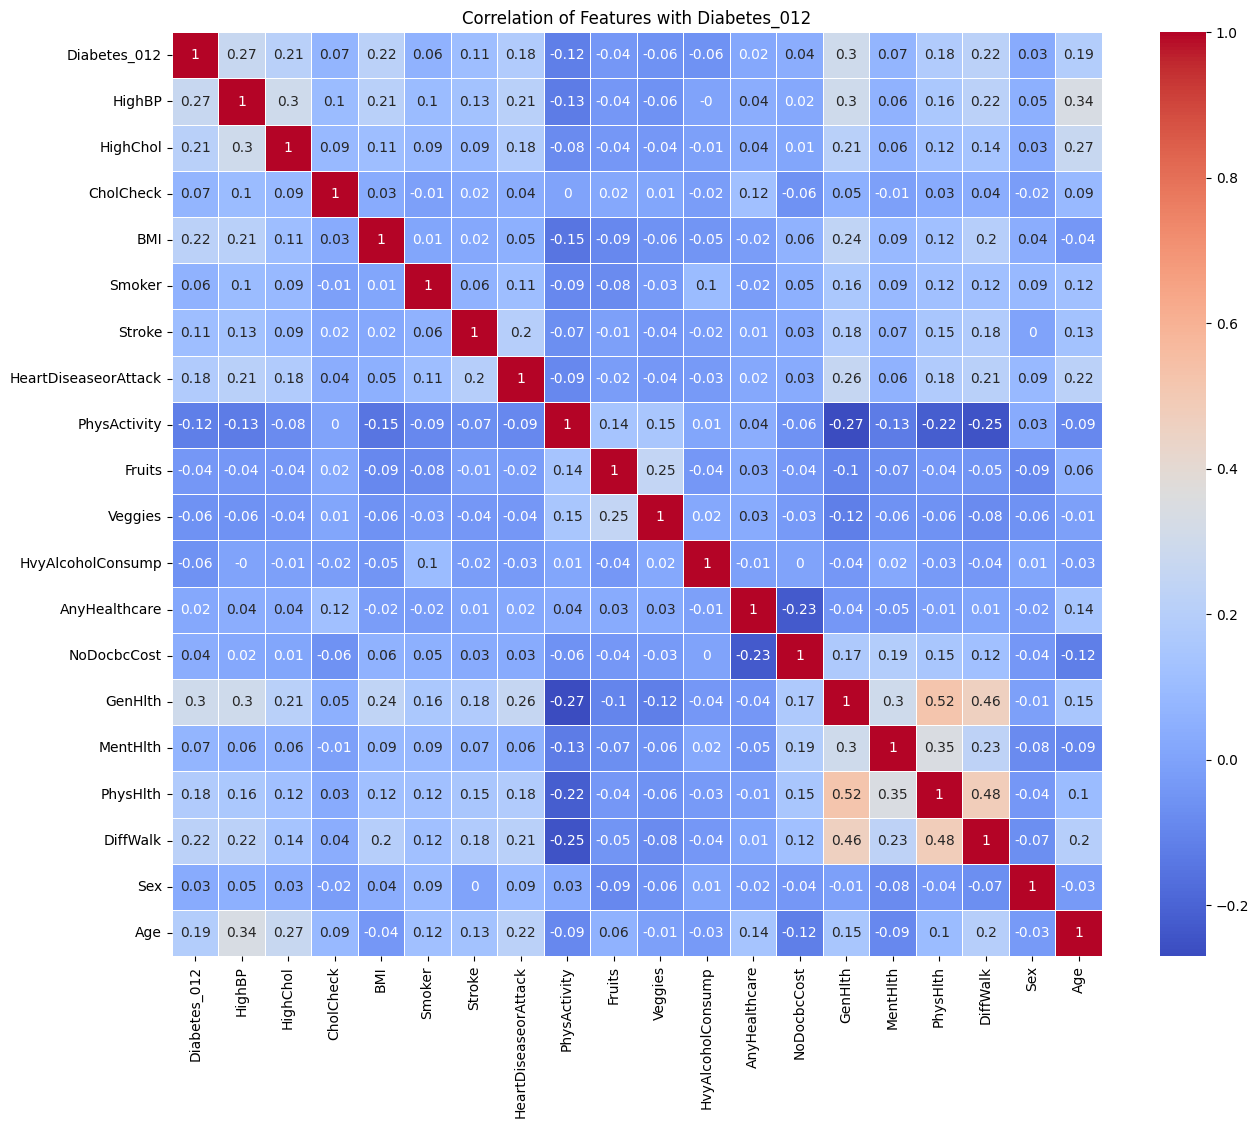

In [69]:
# Correlation Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr.map(lambda x: round(x, 2)), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes_012')
plt.savefig('../visualisations/correlation_heatmap.png')
plt.show()

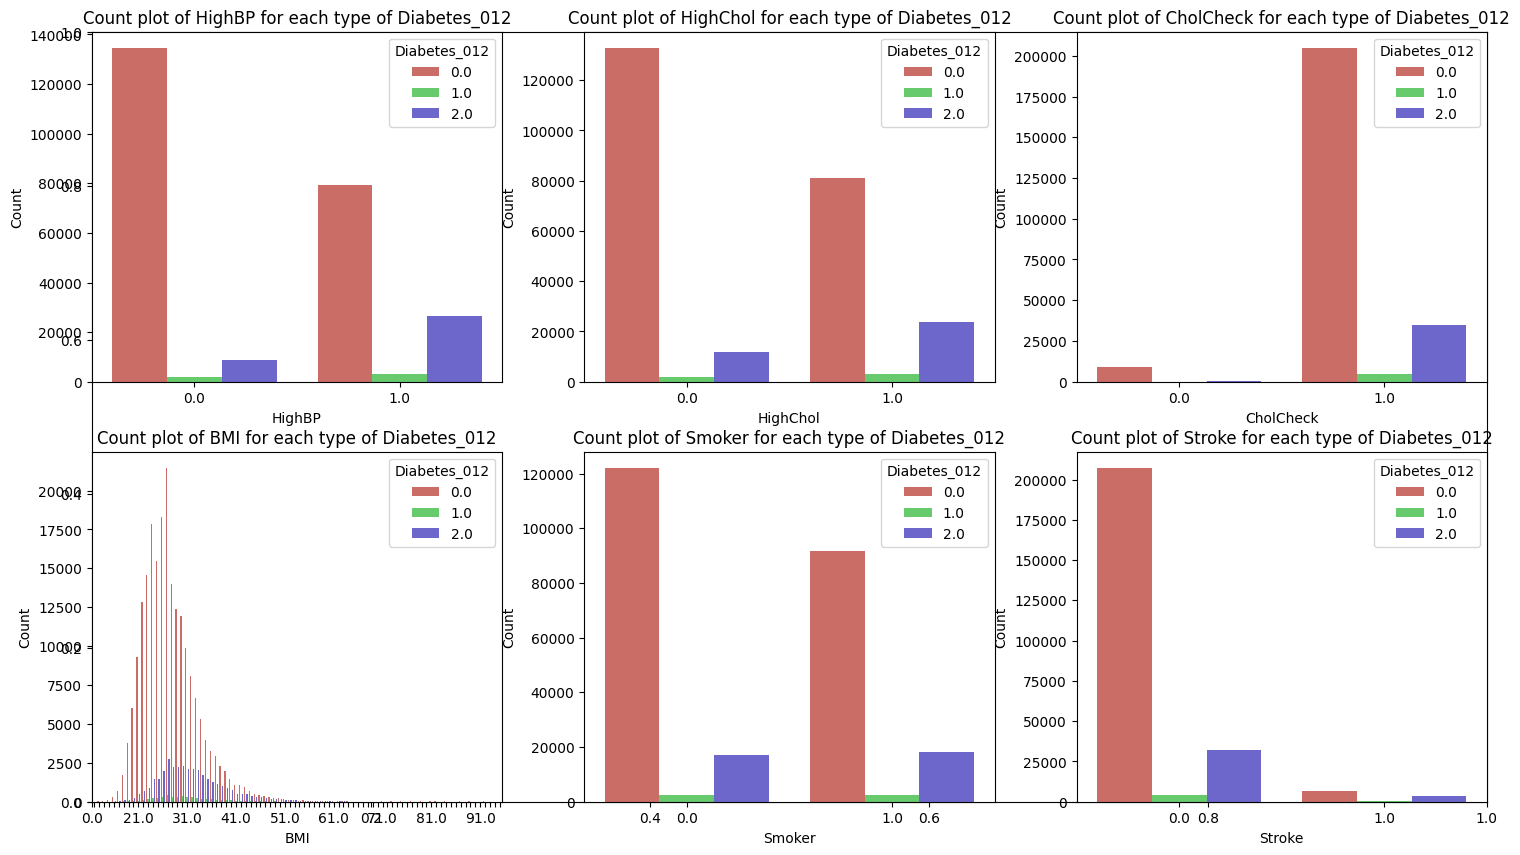

In [70]:
import seaborn.objects as so
# Get the top 3 most correlated features with Diabetes_012
top_features = corr.drop(labels=["Diabetes_012"], axis=0).head(6).index

# Plot scatterplots for the top 6 features
plt.subplots(figsize=(18, 10))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    
    plot = sns.countplot(df, x=feature, hue="Diabetes_012",palette=palette)
    plt.title(f'Count plot of {feature} for each type of Diabetes_012')
    if len(pd.unique(df[feature])) > 50:
        for (j,label) in enumerate(plot.axes.get_xticklabels(),1):
            if j % 10 != 0:
                label.set_visible(False)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.savefig('../visualisations/top_features_count.png')
plt.show()

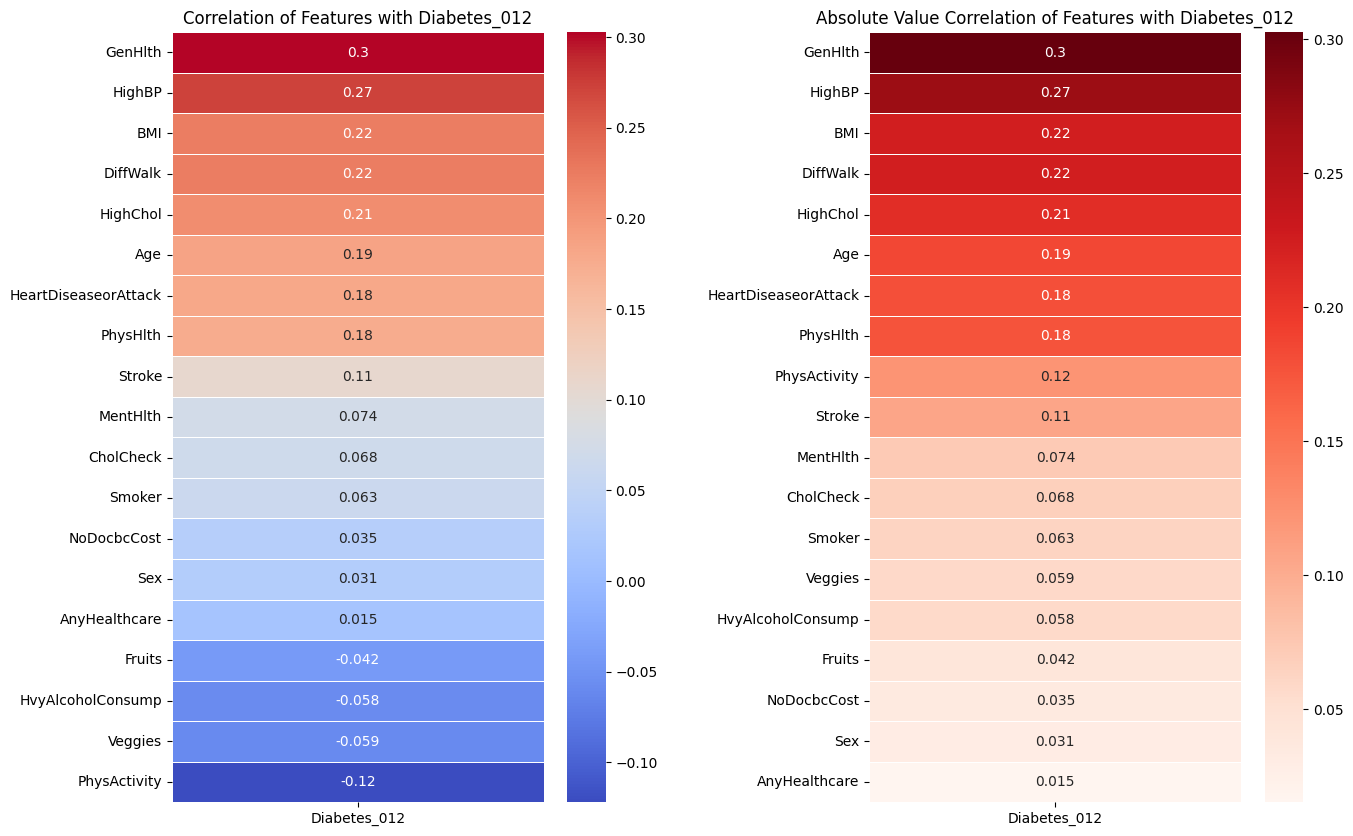

In [131]:
# Correlation of Features with Diabetes_012

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 10))

clean_corr = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0).sort_values(by='Diabetes_012', ascending=False)
sns.heatmap(clean_corr, annot=True, cmap='coolwarm', linewidths=0.5,ax=ax1)
ax1.set_title('Correlation of Features with Diabetes_012')

clean_corr = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0).map(lambda x: abs(x)).sort_values(by='Diabetes_012', ascending=False)
sns.heatmap(clean_corr, annot=True, cmap='Reds', linewidths=0.5, ax=ax2)
ax2.set_title('Absolute Value Correlation of Features with Diabetes_012')

plt.subplots_adjust(wspace=0.5,hspace=0.8)

plt.savefig('../visualisations/correlation_with_diabetes.png')
plt.show()

In [72]:
# Get most related columns
clean_df = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0)
clean_df = clean_df[abs(clean_df["Diabetes_012"]) > 0.1]
related_columns = [*clean_df.index]
related_columns

['HighBP',
 'HighChol',
 'BMI',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Age']

# Preprocessing

In [73]:
from sklearn.model_selection import train_test_split

# Load data
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [74]:
# Load data from the most related columns
X_spec = df.drop(columns=["Diabetes_012", *[c for c in df.columns if c not in related_columns]])
y_spec = df["Diabetes_012"]

# Split data into training and testing sets
X_spec_train, X_spec_test, y_spec_train, y_spec_test = train_test_split(X, y, test_size=0.3)

# Model Training

In [75]:
#function to evaluate model
import timeit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test, X, y):
    metrics = {}
    y_pred = model.predict(X_test)

    # measure average time taken for prediction
    start_time = timeit.default_timer()
    model.predict(X_test)
    end_time = timeit.default_timer()
    avg_prediction_time = (end_time - start_time) / len(X_test)
    
    metrics["Average Prediction Time"] = avg_prediction_time
    
    #get cross validaiton score
    cross_val = np.mean(cross_val_score(model,X,y,cv=5))*100
    
    # get accuracy
    accuracy = accuracy_score(y_test, y_pred)*100
    
    # get precision
    precision = precision_score(y_test, y_pred, average='weighted')*100
    
    # get recall
    recall = recall_score(y_test, y_pred, average='weighted')*100
    
    # get f1 score
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=np.nan)*100
    
    # get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics["Cross Validation"] = cross_val
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision,
    metrics["Recall"] = recall,
    metrics["F1 Score"] = f1
    metrics["Confusion Matrix"] = cm
    metrics["Classification Report"] = report
    
    return metrics

In [76]:
# format metrics output as string
def format_metrics(metrics):
    result = ""

    for metric, value in metrics.items():
        result += f"{metric}: {'\n' if metric == 'Confusion Matrix' or metric == 'Classification Report' else ''} {value}"
        result += "\n"
        
    return result

In [77]:
from sklearn.utils.validation import check_is_fitted

# check if model has been fitted
def is_model_fitted(model):
    try:
        check_is_fitted(model)
        return True
    except:
        return False

In [78]:
# Define a function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, X, y):
    metrics = {}
    # measure training time
    start_time = timeit.default_timer()
    model.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time

    metrics["Training Time"] = training_time
    
    if not is_model_fitted(model):
        model.fit(X_train, y_train)
    
    eval_metrics = evaluate_model(model, X_test, y_test, X, y)
    metrics.update(eval_metrics)
    result = format_metrics(metrics)
        
    return metrics, result

In [79]:
# plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=palette, fmt='d', linewidths=0.5)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [80]:
import joblib

# save full model weights to disk
def save_model(model, filename=None):
    joblib.dump(model, filename)

## Logistic Regression

### Testing across all features

In [81]:
model_metrics = {}

In [82]:
from sklearn.linear_model import LogisticRegression

# Load Logistic Regression model
if not 'lr_model' in locals():
    lr_model = LogisticRegression(max_iter=1000)
    
metrics, results = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test, X, y)
model_metrics["lr_full"] = metrics
print(results)

Training Time:  13.46813550000661
Average Prediction Time:  5.433354351394842e-08
Cross Validation:  84.58096814884894
Accuracy:  84.61184694628403
Precision:  (79.81954587550116,)
Recall:  (84.61184694628403,)
F1 Score:  80.78437539234935
Confusion Matrix: 
 [[62561     0  1629]
 [ 1291     0   120]
 [ 8671     0  1832]]
Classification Report: 
 {'0.0': {'precision': 0.8626366807771327, 'recall': 0.974622215298333, 'f1-score': 0.9152165485359841, 'support': 64190.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1411.0}, '2.0': {'precision': 0.5115889416364144, 'recall': 0.1744263543749405, 'f1-score': 0.26015336552115875, 'support': 10503.0}, 'accuracy': 0.8461184694628403, 'macro avg': {'precision': 0.4580752074711824, 'recall': 0.38301618989109115, 'f1-score': 0.3917899713523809, 'support': 76104.0}, 'weighted avg': {'precision': 0.7981954587550116, 'recall': 0.8461184694628403, 'f1-score': 0.8078437539234935, 'support': 76104.0}}



In [83]:
save_model(lr_model, '../models/lr_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [84]:
# Load Logistic Regression model
if not 'lr_spec_model' in locals():
    lr_spec_model = LogisticRegression(max_iter=1000)

metrics, results = train_and_evaluate_model(lr_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test,X,y)
model_metrics["lr_spec"] = metrics
print(results)

Training Time:  14.317651199991815
Average Prediction Time:  4.7144696810888766e-08
Cross Validation:  84.58096814884894
Accuracy:  84.64601072216966
Precision:  (79.97294048196353,)
Recall:  (84.64601072216966,)
F1 Score:  80.68194064999058
Confusion Matrix: 
 [[62590     0  1458]
 [ 1288     0   118]
 [ 8821     0  1829]]
Classification Report: 
 {'0.0': {'precision': 0.8609471932213648, 'recall': 0.9772358231326506, 'f1-score': 0.9154131352058912, 'support': 64048.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1406.0}, '2.0': {'precision': 0.537151248164464, 'recall': 0.17173708920187794, 'f1-score': 0.2602632515119175, 'support': 10650.0}, 'accuracy': 0.8464601072216966, 'macro avg': {'precision': 0.4660328137952763, 'recall': 0.3829909707781762, 'f1-score': 0.3918921289059362, 'support': 76104.0}, 'weighted avg': {'precision': 0.7997294048196353, 'recall': 0.8464601072216966, 'f1-score': 0.8068194064999058, 'support': 76104.0}}



In [85]:
save_model(lr_spec_model, '../models/lr_spec.joblib')

## K-Nearest Neighbours

### Testing across all features

In [86]:
from sklearn.neighbors import KNeighborsClassifier

# Load K-Nearest Neighbors model
if not 'kn_model' in locals():
    kn_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_model, X_train, y_train, X_test, y_test, X, y)
model_metrics["kn_full"] = metrics
print(results)

  File "C:\Users\B1aZ3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                    

Training Time:  0.028960499999811873
Average Prediction Time:  4.8075458583021156e-05
Cross Validation:  83.06803847366761
Accuracy:  83.19405024703038
Precision:  (78.58090416515061,)
Recall:  (83.19405024703038,)
F1 Score:  80.13037794136685
Confusion Matrix: 
 [[61247    40  2903]
 [ 1250     7   154]
 [ 8417    26  2060]]
Classification Report: 
 {'0.0': {'precision': 0.8636799503624109, 'recall': 0.9541517370306901, 'f1-score': 0.9066644954997631, 'support': 64190.0}, '1.0': {'precision': 0.0958904109589041, 'recall': 0.004961020552799433, 'f1-score': 0.009433962264150943, 'support': 1411.0}, '2.0': {'precision': 0.4025796365057651, 'recall': 0.196134437779682, 'f1-score': 0.26376440460947503, 'support': 10503.0}, 'accuracy': 0.8319405024703038, 'macro avg': {'precision': 0.4540499992756934, 'recall': 0.3850823984543905, 'f1-score': 0.3932876207911297, 'support': 76104.0}, 'weighted avg': {'precision': 0.7858090416515061, 'recall': 0.8319405024703038, 'f1-score': 0.801303779413668

In [87]:
save_model(kn_model, '../models/kn_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [88]:
# Load K-Nearest Neighbors model
if not 'kn_spec_model' in locals():
    kn_spec_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test,X,y)
model_metrics["kn_spec"] = metrics
print(results)

Training Time:  0.03547430000617169
Average Prediction Time:  5.124946783350725e-05
Cross Validation:  83.06803847366761
Accuracy:  83.09812887627457
Precision:  (78.34685801771967,)
Recall:  (83.09812887627457,)
F1 Score:  79.98589257338985
Confusion Matrix: 
 [[61142    50  2856]
 [ 1228     2   176]
 [ 8529    24  2097]]
Classification Report: 
 {'0.0': {'precision': 0.8623816979082921, 'recall': 0.9546277791656258, 'f1-score': 0.9061631603518419, 'support': 64048.0}, '1.0': {'precision': 0.02631578947368421, 'recall': 0.001422475106685633, 'f1-score': 0.002699055330634278, 'support': 1406.0}, '2.0': {'precision': 0.40885162799766034, 'recall': 0.19690140845070422, 'f1-score': 0.2657963115533304, 'support': 10650.0}, 'accuracy': 0.8309812887627457, 'macro avg': {'precision': 0.4325163717932122, 'recall': 0.3843172209076719, 'f1-score': 0.3915528424119355, 'support': 76104.0}, 'weighted avg': {'precision': 0.7834685801771967, 'recall': 0.8309812887627457, 'f1-score': 0.79985892573389

In [89]:
save_model(kn_spec_model, '../models/kn_spec.joblib')

## Decision Tree Classifier

### Testing across all features

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Load Decision Tree model
if not 'dt_model' in locals():
    dt_model = DecisionTreeClassifier()

metrics, results = train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test, X, y)
model_metrics["dt_full"] = metrics
print(results)

Training Time:  0.439397000009194
Average Prediction Time:  4.1118600870545085e-07
Cross Validation:  78.12992746767581
Accuracy:  77.94991064858614
Precision:  (78.04922531266048,)
Recall:  (77.94991064858614,)
F1 Score:  77.99938310594317
Confusion Matrix: 
 [[56117  1134  6939]
 [ 1032    45   334]
 [ 6974   368  3161]]
Classification Report: 
 {'0.0': {'precision': 0.8751462033903592, 'recall': 0.874232746533728, 'f1-score': 0.8746892364764287, 'support': 64190.0}, '1.0': {'precision': 0.029088558500323207, 'recall': 0.031892274982282066, 'f1-score': 0.030425963488843813, 'support': 1411.0}, '2.0': {'precision': 0.30295188805827106, 'recall': 0.3009616300104732, 'f1-score': 0.30195347948607726, 'support': 10503.0}, 'accuracy': 0.7794991064858614, 'macro avg': {'precision': 0.4023955499829845, 'recall': 0.4023622171754944, 'f1-score': 0.4023562264837833, 'support': 76104.0}, 'weighted avg': {'precision': 0.7804922531266049, 'recall': 0.7794991064858614, 'f1-score': 0.779993831059431

In [91]:
save_model(dt_model, '../models/dt_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [92]:
# Load Decision Tree model
if not 'dt_spec_model' in locals():
    dt_spec_model = DecisionTreeClassifier()
    
metrics, results = train_and_evaluate_model(dt_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test,X,y)
model_metrics["dt_spec"] = metrics
print(results)

Training Time:  0.45180209999671206
Average Prediction Time:  2.9680305905509186e-07
Cross Validation:  78.16501103752759
Accuracy:  77.85267528645012
Precision:  (77.9099331492576,)
Recall:  (77.85267528645012,)
F1 Score:  77.88079934821859
Confusion Matrix: 
 [[55964  1131  6953]
 [ 1074    49   283]
 [ 7017   397  3236]]
Classification Report: 
 {'0.0': {'precision': 0.8736866755132309, 'recall': 0.873782163377467, 'f1-score': 0.8737344168364519, 'support': 64048.0}, '1.0': {'precision': 0.031071655041217502, 'recall': 0.03485064011379801, 'f1-score': 0.032852832718739525, 'support': 1406.0}, '2.0': {'precision': 0.3090145148968678, 'recall': 0.30384976525821594, 'f1-score': 0.3064103778051321, 'support': 10650.0}, 'accuracy': 0.7785267528645012, 'macro avg': {'precision': 0.40459094848377203, 'recall': 0.40416085624982695, 'f1-score': 0.4043325424534412, 'support': 76104.0}, 'weighted avg': {'precision': 0.779099331492576, 'recall': 0.7785267528645012, 'f1-score': 0.778807993482185

In [93]:
save_model(dt_spec_model, '../models/dt_spec.joblib')

## Random Forest Classifier

### Testing across all features

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Load Random Forest model
if not 'rf_model' in locals():
    rf_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, X, y)
model_metrics["rf_full"] = metrics
print(results)

Training Time:  12.849956899997778
Average Prediction Time:  2.804039735104302e-05
Cross Validation:  83.41296121097447
Accuracy:  83.57510774729317
Precision:  (79.33237583204381,)
Recall:  (83.57510774729317,)
F1 Score:  80.77941752853926
Confusion Matrix: 
 [[61234   125  2831]
 [ 1228     6   177]
 [ 8102    37  2364]]
Classification Report: 
 {'0.0': {'precision': 0.8677796043308202, 'recall': 0.9539492132730955, 'f1-score': 0.9088264541312318, 'support': 64190.0}, '1.0': {'precision': 0.03571428571428571, 'recall': 0.004252303330970942, 'f1-score': 0.007599746675110829, 'support': 1411.0}, '2.0': {'precision': 0.4400595681310499, 'recall': 0.225078548986004, 'f1-score': 0.2978267716535433, 'support': 10503.0}, 'accuracy': 0.8357510774729318, 'macro avg': {'precision': 0.4478511527253853, 'recall': 0.39442668853002344, 'f1-score': 0.404750990819962, 'support': 76104.0}, 'weighted avg': {'precision': 0.7933237583204381, 'recall': 0.8357510774729318, 'f1-score': 0.8077941752853925, 

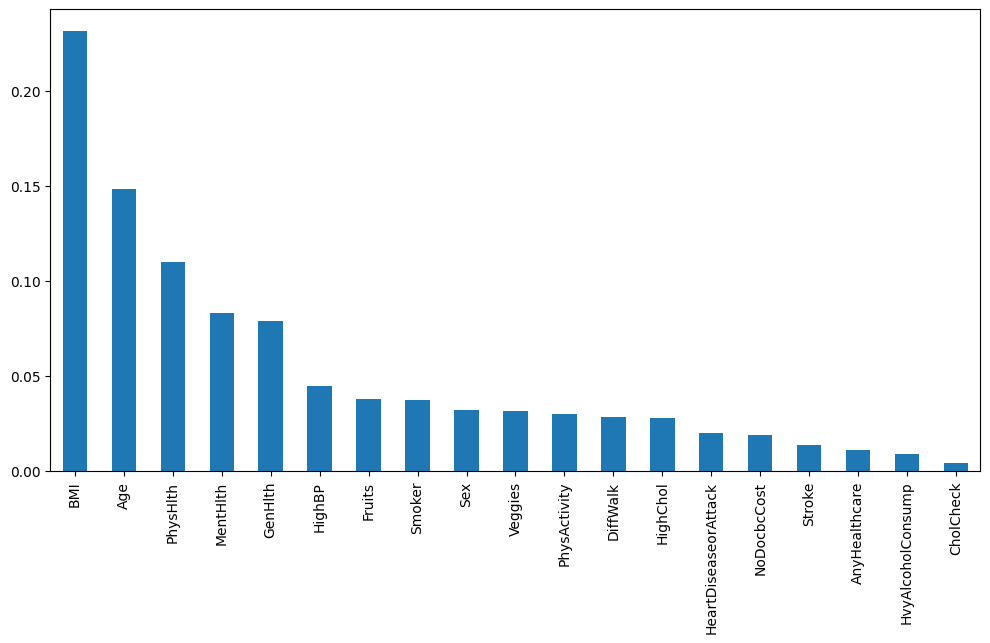

In [95]:
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns=["Diabetes_012"]).columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6))
plt.savefig("../visualisations/rf_feature_importances.png")
plt.show()

### Testing across features with correlation scores of >|0.1|

In [96]:
# Load Decision Tree model
if not 'rf_spec_model' in locals():
    rf_spec_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test, X, y)
model_metrics["rf_spec"] = metrics
print(results)

Training Time:  12.831823800006532
Average Prediction Time:  2.794819720375383e-05
Cross Validation:  83.40941343424788
Accuracy:  83.36618311783874
Precision:  (78.95247017890792,)
Recall:  (83.36618311783874,)
F1 Score:  80.44852945934954
Confusion Matrix: 
 [[61137   119  2792]
 [ 1205     3   198]
 [ 8309    36  2305]]
Classification Report: 
 {'0.0': {'precision': 0.8653380702325516, 'recall': 0.9545497127154634, 'f1-score': 0.9077572958967772, 'support': 64048.0}, '1.0': {'precision': 0.0189873417721519, 'recall': 0.0021337126600284497, 'f1-score': 0.0038363171355498722, 'support': 1406.0}, '2.0': {'precision': 0.43531633616619453, 'recall': 0.2164319248826291, 'f1-score': 0.2891188460332393, 'support': 10650.0}, 'accuracy': 0.8336618311783874, 'macro avg': {'precision': 0.4398805827236327, 'recall': 0.3910384500860404, 'f1-score': 0.4002374863551888, 'support': 76104.0}, 'weighted avg': {'precision': 0.7895247017890792, 'recall': 0.8336618311783874, 'f1-score': 0.804485294593495

In [97]:
import csv
import os

def save_metrics(metrics, directory_name):
    # Create directory if it doesn't exist
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    
    # Save general metrics to CSV
    general_metrics_file = os.path.join(directory_name, 'general_metrics.csv')
    with open(general_metrics_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Metric", "Value"])
        for metric, value in metrics.items():
            if metric not in ["Confusion Matrix", "Classification Report"]:
                writer.writerow([metric, value])
    
    # Save confusion matrix to CSV
    confusion_matrix_file = os.path.join(directory_name, 'confusion_matrix.csv')
    with open(confusion_matrix_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([""] + ["Predicted 0", "Predicted 1", "Predicted 2"])
        for i, row in enumerate(metrics["Confusion Matrix"]):
            writer.writerow([f"Actual {i}"] + list(row))
    
    # Save classification report to CSV
    classification_report_file = os.path.join(directory_name, 'classification_report.csv')
    with open(classification_report_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Class", "Precision", "Recall", "F1-Score", "Support"])
        for label, c_metrics in metrics["Classification Report"].items():
            if isinstance(c_metrics, dict):
                writer.writerow([label, c_metrics["precision"], c_metrics["recall"], c_metrics["f1-score"], c_metrics["support"]])

In [98]:
from tqdm import tqdm

# Save all metrics to CSV files
for model, metrics in tqdm(model_metrics.items()):
    # General model metrics
    metrics["Precision"] = metrics["Precision"][0]
    metrics["Recall"] = metrics["Recall"][0]
    model_metrics[model] = metrics
    save_metrics(metrics, f'../results/{model}')

100%|██████████| 8/8 [00:00<00:00, 1366.00it/s]


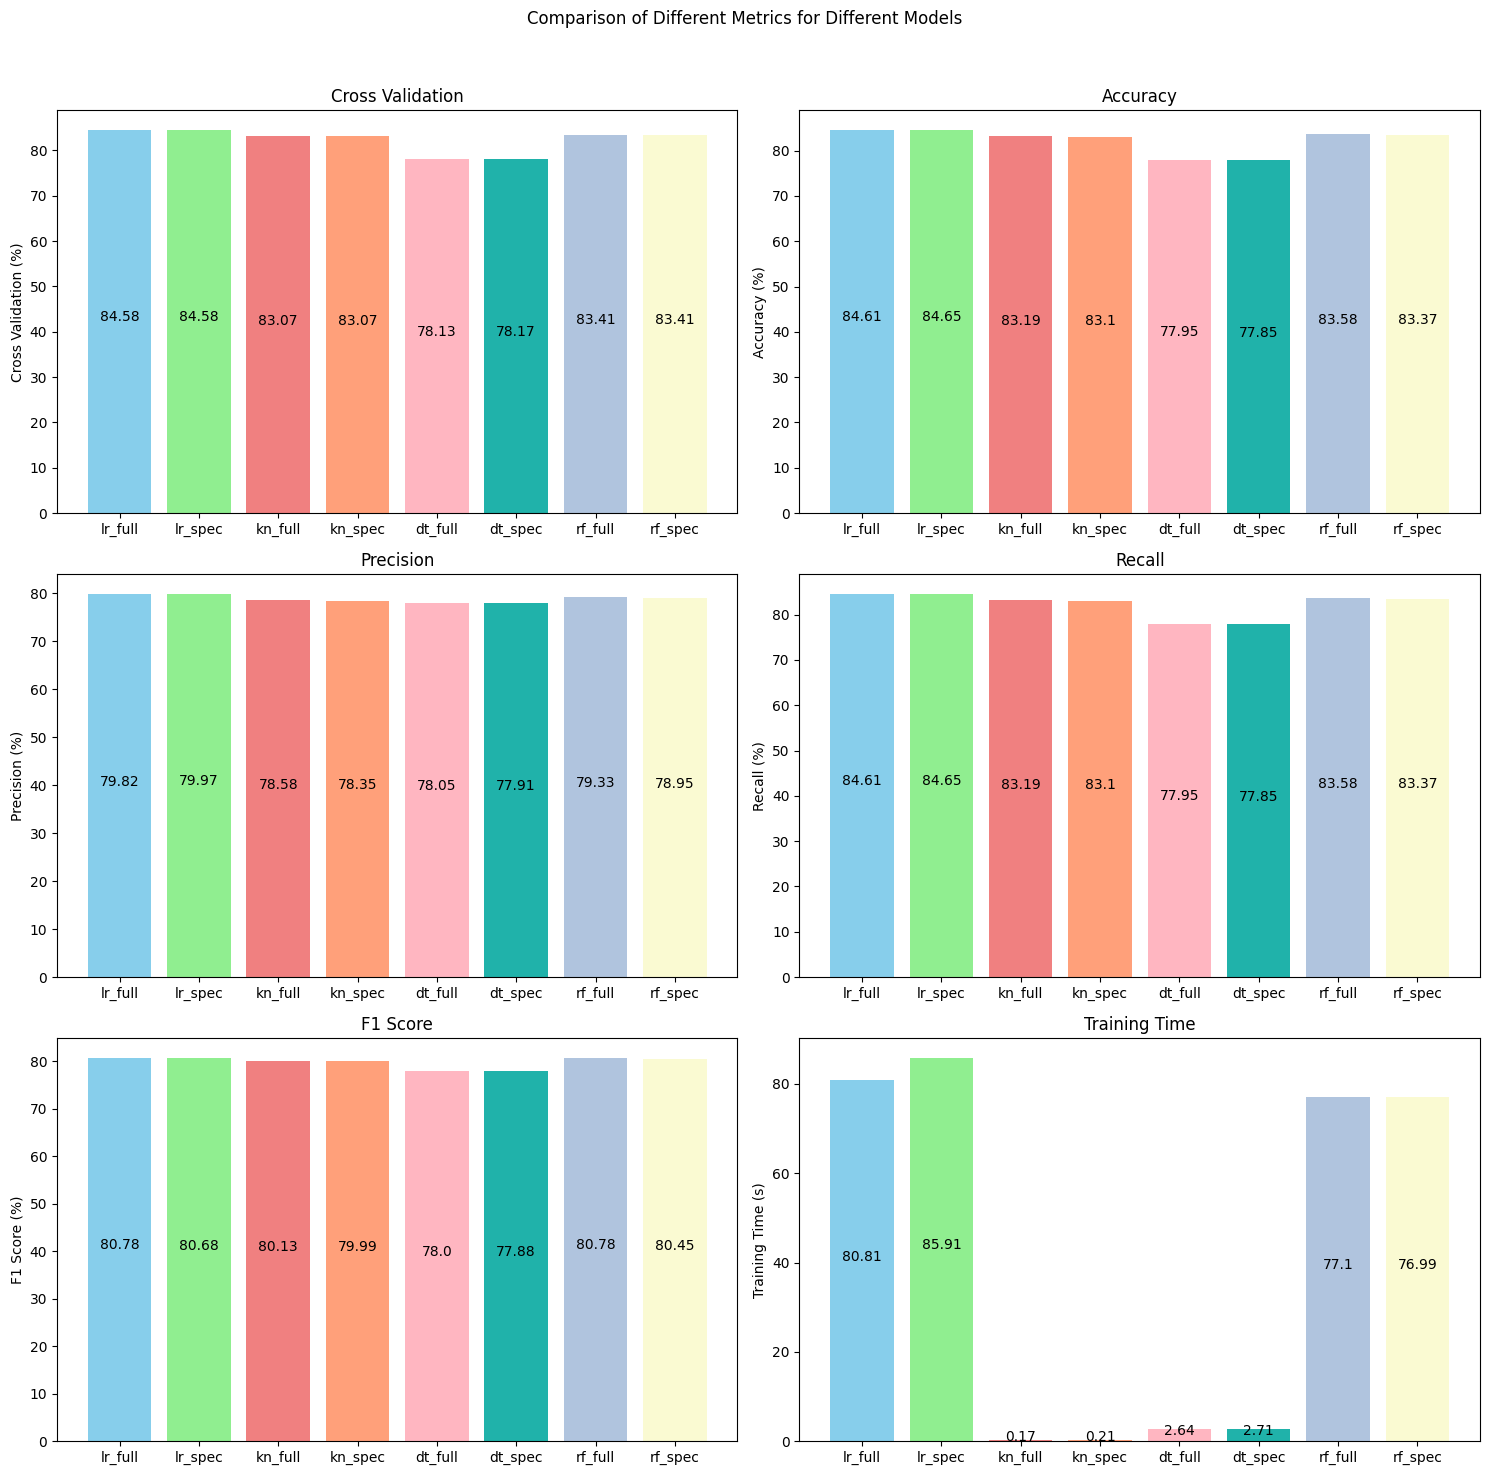

In [101]:
# Extract metrics from model_metrics
metrics_to_plot = ['Cross Validation','Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time']
units = ['%','%','%','%','%','s']
# Prepare data for plotting
metrics_data = {metric: {model: model_metrics[model][metric] for model in model_metrics} for metric in metrics_to_plot}

# Plot the metrics
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, metric,unit in zip(axes.flatten(), metrics_to_plot,units):
    models = list(metrics_data[metric].keys())
    values = list(metrics_data[metric].values())
    if (metric == 'Training Time'):
        for i,v in enumerate(values):
            values[i] = v*6
    # Plot the metric
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightseagreen', 'lightsteelblue', 'lightgoldenrodyellow']
    ax.bar(models, values, color=colors)
    ax.set_title(metric)
    ax.set_ylabel(metric+f" ({unit})")
    for i, v in enumerate(values):
        ax.text(i, v * 0.5, round(v,2), ha='center')

plt.suptitle('Comparison of Different Metrics for Different Models')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('../visualisations/metrics_comparison.png')
plt.show()
